In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import scipy 
import os
# import seaborn as sns
# import scipy.stats as stats
import unittest

In [2]:
df_battery = pd.read_csv('Battery_Dataset.csv')

In [3]:
import csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold 
import math

from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 1000})
import statistics as stcs
import scipy.stats as stats

import sklearn as sk
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,scale,MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import uniform,expon
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [4]:
#One hot encoding (alphebetical order)
ohe = OneHotEncoder()
ACE = df_battery.loc[:,['anode','cathode','electrolyte']]
ACE = ohe.fit_transform(ACE)
ACE = pd.DataFrame(ACE.toarray())

ACE_col_name = ['A1','C1','C2','C3','E1','E2','E3']
for i in range(len(ACE.columns)):
    ACE = ACE.rename({ACE.columns[i]: ACE_col_name[i]}, axis=1) 
    
df_battery = pd.concat([ACE, df_battery],axis=1)

In [5]:
data = df_battery

np.random.seed(66)
def data_split (data, test_ratio):
    
    total_row = df_battery.shape[0]
    test_row = round(total_row *test_ratio)
    train_row = total_row - test_row
    
    indices =np.random.permutation(total_row)
    train_indx, test_idx =indices[:train_row], indices[train_row:]
    train,test = df_battery.iloc[train_indx,:], df_battery.iloc[test_idx,:]

    X_test = test[['A1','C1','C2','C3','E1','E2','E3','Cycle','temperature','discharge_crate']]
#    y_test = test[['Charge_Capacity (Ah)']]
    y_test = test[['Discharge_Capacity (Ah)']]
#    y_test = test[['Charge_Energy (Wh)']]
#    y_test = test[['Discharge_Energy (Wh)']]
#    y_test = test[['Coulombic_Efficiency (%)']]
#    y_test = test[['Energy_Efficiency (%)']]
    X_train = train[['A1','C1','C2','C3','E1','E2','E3','Cycle','temperature','discharge_crate']]
#    y_train = train[['Charge_Capacity (Ah)']]
    y_train = train[['Discharge_Capacity (Ah)']]
#    y_train = train[['Charge_Energy (Wh)']]
#    y_train = train[['Discharge_Energy (Wh)']]
#    y_train = train[['Coulombic_Efficiency (%)']]
#    y_train = train[['Energy_Efficiency (%)']]
    return train,test,X_train,y_train,X_test,y_test
    
train,test,X_train,y_train,X_test,y_test = data_split(data,0.2)


In [6]:
kf = KFold(n_splits=10,random_state =66,shuffle= True)

In [7]:
rand_para = {'n_estimators':[100, 200, 300, 400],
             'max_features':[1, 3, 5, 7],
             'max_depth': [6, 7, 8, 9]}
reg=RandomForestRegressor(random_state = 66,min_samples_leaf =1,min_samples_split=2)

n_iteration = 200
Scoring = ['explained_variance','neg_mean_squared_error',"r2"]
random_search = RandomizedSearchCV(reg,param_distributions=rand_para,cv =5,
error_score=0,random_state=66,return_train_score=True,n_jobs=-1,n_iter=n_iteration,verbose=10,refit=True)

random_search.fit(X_train,y_train)

#y_predict=random_search.predict(X_test)
#math.sqrt(stcs.mean((y_predict-y_test)**2))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 64 is smaller than n_iter=200. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConvers

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConvers

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConvers

[CV 3/5; 2/64] START max_depth=6, max_features=1, n_estimators=200..............
[CV 3/5; 2/64] END max_depth=6, max_features=1, n_estimators=200;, score=(train=0.785, test=0.525) total time=   0.6s
[CV 4/5; 3/64] START max_depth=6, max_features=1, n_estimators=300..............
[CV 4/5; 3/64] END max_depth=6, max_features=1, n_estimators=300;, score=(train=0.737, test=0.770) total time=   0.9s
[CV 1/5; 5/64] START max_depth=6, max_features=3, n_estimators=100..............
[CV 1/5; 5/64] END max_depth=6, max_features=3, n_estimators=100;, score=(train=0.797, test=0.444) total time=   0.3s
[CV 3/5; 5/64] START max_depth=6, max_features=3, n_estimators=100..............
[CV 3/5; 5/64] END max_depth=6, max_features=3, n_estimators=100;, score=(train=0.789, test=0.535) total time=   0.3s
[CV 2/5; 6/64] START max_depth=6, max_features=3, n_estimators=200..............
[CV 2/5; 6/64] END max_depth=6, max_features=3, n_estimators=200;, score=(train=0.767, test=0.607) total time=   0.6s
[CV 4

/home/kli625/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=RandomForestRegressor(random_state=66), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 7, 8, 9],
                                        'max_features': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=66, return_train_score=True, verbose=10)

In [8]:
RF_model_Capacity =RandomForestRegressor(n_estimators=666,min_samples_split=5,
             max_depth=7,min_samples_leaf=1,random_state = 66)

train_results =[]
train_results_name =['Experimental','Predicted','RMSE']


for train_index, test_index in kf.split(X_train):
    #print("Train:", train_index, "Validation:", test_index)
    X_training, X_validate = X_train.iloc[train_index], X_train.iloc[test_index]
    y_training, y_validate = y_train.iloc[train_index], y_train.iloc[test_index]
    
    np.random.seed(66)
    RF_model_Capacity.fit(X_training,y_training)
    y_train_predicted = RF_model_Capacity.predict(X_validate)
#     number_validate =X_validate.shape[0]
    mse = mean_squared_error(y_train_predicted, y_validate)
    RMSE = np.sqrt(mse)
#     Y_train_predicted = y_train_predicted.reshape(24,1)
#     print(y_train_predicted.shape)
#     squared_deviations = (y_train_predicted.reshape(24,1) - y_validate)**2
#     RMSE=math.sqrt(squared_deviations.sum()/number_validate)
    train_results.append([y_validate,y_train_predicted,RMSE])

/tmp/ipykernel_7226/445779285.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_Capacity.fit(X_training,y_training)
/tmp/ipykernel_7226/445779285.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_Capacity.fit(X_training,y_training)
/tmp/ipykernel_7226/445779285.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_Capacity.fit(X_training,y_training)
/tmp/ipykernel_7226/445779285.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_Capacity.fit(X_training,y_training)
/tmp/ipykernel_7226/445779285.py:14: DataCon

In [9]:
Train_results = pd.DataFrame (train_results,columns=train_results_name)

predict_results = pd.DataFrame (Train_results.iloc[:,1])

np.average(Train_results['RMSE'])

0.5764445631787132

In [10]:
np.random.seed(66)
RF_model_Capacity.fit(X_train,y_train)
y_predict = RF_model_Capacity.predict(X_test)
#math.sqrt(stcs.mean((y_predict.reshape(80,1)-y_test)**2))

mse = mean_squared_error(y_train_predicted, y_validate)
RMSE = np.sqrt(mse)
RMSE
# number_test =X_test.shape[0]
# squared_deviations=(y_predict.reshape(80,1)-y_test)**2
# math.sqrt(squared_deviations.sum()/number_test)


/tmp/ipykernel_7226/728272610.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_Capacity.fit(X_train,y_train)


0.7137930587845881

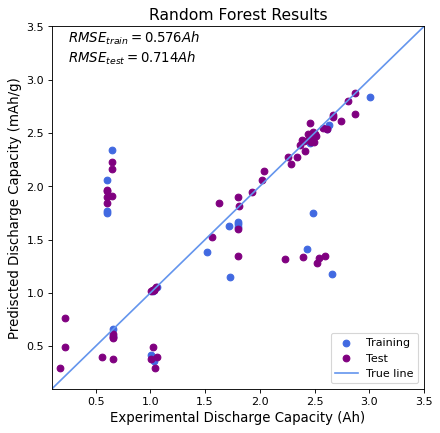

In [16]:
figure(figsize=(6, 6), dpi=80)

plt.axis([0.1,3.5,0.1,3.5])
plt.scatter(x = y_validate, y = y_train_predicted, c='royalblue',label='Training')
plt.scatter(x = y_test, y = y_predict, c='purple',label='Test')
plt.plot([0,5],[0,5],label ='True line',c='cornflowerblue')
plt.legend(loc='lower right')
plt.title(label='Random Forest Results',fontsize = 14)

plt.xlabel(r'Experimental Discharge Capacity (Ah)',fontsize = 12)
plt.ylabel(r'Prediscted Discharge Capacity (mAh/g)',fontsize = 12)
plt.text(0.25, 3, r'$RMSE_{train}=0.576Ah$'+'\n'+r'$RMSE_{test}=0.714Ah$' +"\n",fontsize = 12)
plt.savefig('RandomForest-Predicted-vs-test.png',dpi=600)
plt.show()

In [12]:
"""
total = sum((y_test-stcs.mean(y_test))**2)
unexplained = sum((y_test-y_predict)**2)

R_square_test = 1-(unexplained/total)
"""


'\ntotal = sum((y_test-stcs.mean(y_test))**2)\nunexplained = sum((y_test-y_predict)**2)\n\nR_square_test = 1-(unexplained/total)\n'

In [13]:
"""
R_square_test
"""

'\nR_square_test\n'